# REIGNOEL D. RODRIGUEZ - BSIT - BA 3101 PC9

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

df = pd.read_csv('nfl_basicstats.csv');

In [2]:
df

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,73.0,"Detroit , MI",2/15/1944,Michigan State,Retired,NaN,1 Season,71.0,NaN,NaN,"Goovert, Ron",NaN,rongoovert/2515082,NaN,225.0,1967 - 1967
17168,32.0,"Worland , WY",8/19/1984,Weber State,Retired,NaN,1 Season,75.0,NaN,NaN,"Folsom, J.D.",NaN,j.d.folsom/238485,NaN,230.0,2009 - 2010
17169,43.0,"Washington , DC",5/4/1974,Akron,Retired,NaN,1 Season,72.0,NaN,NaN,"Reader, Jamie",NaN,jamiereader/2502599,NaN,238.0,2001 - 2001
17170,NaN,"New Willard , TX",3/30/1921,Baylor,Retired,NaN,2 Seasons,73.0,NaN,NaN,"Barnett, Solon",NaN,solonbarnett/2509044,NaN,235.0,1945 - 1946


In [3]:
df.isna().sum()

Age                      3668
Birth Place              2378
Birthday                  337
College                    39
Current Status              0
Current Team            14076
Experience                 39
Height (inches)           146
High School             14658
High School Location    14662
Name                        0
Number                  15464
Player Id                   0
Position                14076
Weight (lbs)               51
Years Played             3096
dtype: int64

# Data Cleaning

In [4]:
#Check if there is outliers

q1 = df['Age'].quantile(0.25);
q3 = df['Age'].quantile(0.75);
IQR = q3 - q1;
mini = q1 - (IQR * .5);
maxi = q3 + (IQR * .5);
print(mini);
print(maxi);

14.5
68.5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Check Outliers'}, xlabel='Age'>

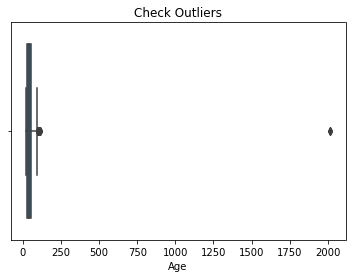

In [5]:
#Checking outliers by boxplot
plt.title('Check Outliers')
sns.boxplot(df['Age'])

In [6]:
df.describe()

,Age,Height (inches),Number,Weight (lbs)
count,13504.000000,17026.000000,1708.000000,17121.000000
mean,43.839307,73.508399,51.771077,229.220665
std,34.133513,2.577632,28.497726,42.732732
min,19.000000,61.000000,1.000000,1.000000
25%,28.000000,72.000000,26.000000,195.000000
50%,39.000000,74.000000,52.000000,220.000000
75%,55.000000,75.000000,77.000000,255.000000
max,2017.000000,82.000000,99.000000,375.000000


# Handle Missing Values

In [7]:
#Filling missing values in age with NaN values

df.loc[(df['Age'] < mini) | (df['Age'] > maxi),'Age'] = np.nan;
df

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,NaN,"Detroit , MI",2/15/1944,Michigan State,Retired,NaN,1 Season,71.0,NaN,NaN,"Goovert, Ron",NaN,rongoovert/2515082,NaN,225.0,1967 - 1967
17168,32.0,"Worland , WY",8/19/1984,Weber State,Retired,NaN,1 Season,75.0,NaN,NaN,"Folsom, J.D.",NaN,j.d.folsom/238485,NaN,230.0,2009 - 2010
17169,43.0,"Washington , DC",5/4/1974,Akron,Retired,NaN,1 Season,72.0,NaN,NaN,"Reader, Jamie",NaN,jamiereader/2502599,NaN,238.0,2001 - 2001
17170,NaN,"New Willard , TX",3/30/1921,Baylor,Retired,NaN,2 Seasons,73.0,NaN,NaN,"Barnett, Solon",NaN,solonbarnett/2509044,NaN,235.0,1945 - 1946


In [8]:
df['Age'] = df['Age'].fillna(method='bfill');
df['Birth Place'] = df['Birth Place'].fillna('NA');
df['Birthday'] = df['Birthday'].fillna('NA');
df['College'] = df['College'].fillna('NA');
df['Current Team'] = df['Current Team'].fillna('NA');
df['Experience'] = df['Experience'].fillna('NA');
df['Height (inches)'] = df['Height (inches)'].fillna('NA');
df['High School'] = df['High School'].fillna('NA');
df['High School Location'] = df['High School Location'].fillna('NA');
df['Number'] = df['Number'].fillna('NA');
df['Position'] = df['Position'].fillna('NA');
df['Weight (lbs)'] = df['Weight (lbs)'].fillna('NA');
df['Years Played'] = df['Years Played'].fillna('NA');

In [9]:
#Check if there is still a null Values

df.isna().sum()

Age                     0
Birth Place             0
Birthday                0
College                 0
Current Status          0
Current Team            0
Experience              0
Height (inches)         0
High School             0
High School Location    0
Name                    0
Number                  0
Player Id               0
Position                0
Weight (lbs)            0
Years Played            0
dtype: int64

In [10]:
newdf = df[['Age']]
newdf

,Age
0,56.0
1,56.0
2,56.0
3,30.0
4,25.0
...,...
17167,32.0
17168,32.0
17169,43.0
17170,54.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

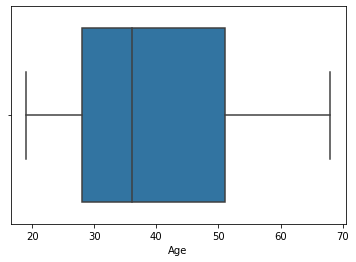

In [11]:
#Check again if there is still outliers

sns.boxplot(newdf['Age'])

# Normalization

In [12]:
##normalization

df['Age'] =  (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

df.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,0.755102,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NA,3 Seasons,71.0,NA,NA,"Evans, Fred",NA,fredevans/2513736,NA,185.0,1946 - 1948
1,0.755102,"Dayton , OH",12/21/1930,Dayton,Retired,NA,1 Season,70.0,NA,NA,"Raiff, Jim",NA,jimraiff/2523700,NA,235.0,1954 - 1954
2,0.755102,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NA,1 Season,74.0,NA,NA,"Fowler, Bobby",NA,bobbyfowler/2514295,NA,230.0,1985 - 1985
3,0.224490,"New Orleans , LA",9/30/1986,LSU,Retired,NA,5 Seasons,73.0,NA,NA,"Johnson, Quinn",NA,quinnjohnson/79593,NA,255.0,2009 - 2013
4,0.122449,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NA


In [13]:
newdf.describe()

,Age
count,17172.000000
mean,39.472746
std,13.375051
min,19.000000
25%,28.000000
50%,36.000000
75%,51.000000
max,68.000000


# One-Hot Encoding

In [14]:
#One-Hot encoding for getting the correlation of Age and Height

dummy = df[['Age', 'Current Status']]
dummy1 = pd.get_dummies(dummy)
dummy1

,Age,Current Status_Active,Current Status_Injured reserve,Current Status_Physically unable to perform,Current Status_Retired,Current Status_Suspended,Current Status_Unsigned free agent
0,0.755102,0,0,0,1,0,0
1,0.755102,0,0,0,1,0,0
2,0.755102,0,0,0,1,0,0
3,0.224490,0,0,0,1,0,0
4,0.122449,1,0,0,0,0,0
...,...,...,...,...,...,...,...
17167,0.265306,0,0,0,1,0,0
17168,0.265306,0,0,0,1,0,0
17169,0.489796,0,0,0,1,0,0
17170,0.714286,0,0,0,1,0,0


# Data Visualization

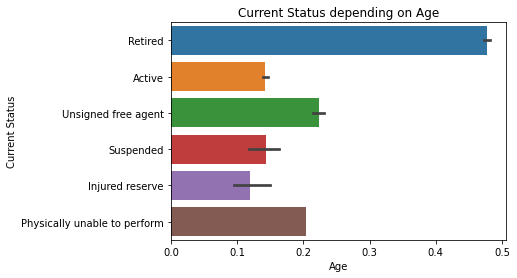

In [15]:
#Data Visualization
plt.title('Current Status depending on Age')
sns.barplot(x=df['Age'], y=df['Current Status'])
plt.show()

# Correlation

In [16]:
dummy2 = dummy1.corr()
dummy2

,Age,Current Status_Active,Current Status_Injured reserve,Current Status_Physically unable to perform,Current Status_Retired,Current Status_Suspended,Current Status_Unsigned free agent
Age,1.000000,-0.452935,-0.032291,-0.005976,0.464691,-0.015376,-0.077138
Current Status_Active,-0.452935,1.000000,-0.013265,-0.003424,-0.956571,-0.006848,-0.048576
Current Status_Injured reserve,-0.032291,-0.013265,1.000000,-0.000226,-0.063047,-0.000451,-0.003202
Current Status_Physically unable to perform,-0.005976,-0.003424,-0.000226,1.000000,-0.016272,-0.000116,-0.000826
Current Status_Retired,0.464691,-0.956571,-0.063047,-0.016272,1.000000,-0.032547,-0.230880
Current Status_Suspended,-0.015376,-0.006848,-0.000451,-0.000116,-0.032547,1.000000,-0.001653
Current Status_Unsigned free agent,-0.077138,-0.048576,-0.003202,-0.000826,-0.230880,-0.001653,1.000000


<AxesSubplot:>

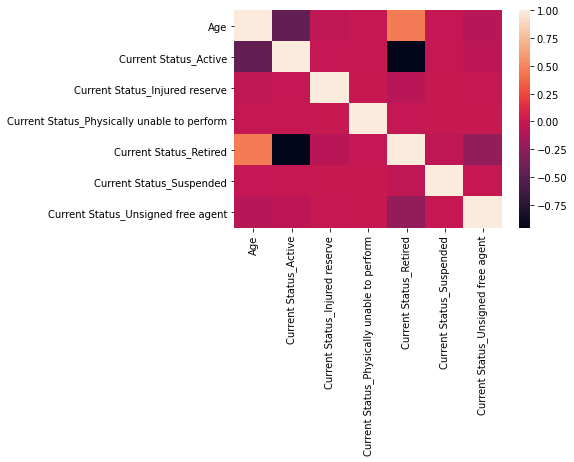

In [17]:
#Correlation of age and current status

sns.heatmap(dummy2)

# Conclusion

In [18]:
#After analyzing the data we can see that the age and current status are not correlated. 

In [19]:
#This is also a correlation, to check if there is correlation between current tem and current status

dummy = df[['Current Team', 'Current Status']]
dummy1 = pd.get_dummies(dummy)
dummy1

,Current Team_Arizona Cardinals,Current Team_Atlanta Falcons,Current Team_Baltimore Ravens,Current Team_Buffalo Bills,Current Team_Carolina Panthers,Current Team_Chicago Bears,Current Team_Cincinnati Bengals,Current Team_Cleveland Browns,Current Team_Dallas Cowboys,Current Team_Denver Broncos,...,Current Team_Seattle Seahawks,Current Team_Tampa Bay Buccaneers,Current Team_Tennessee Titans,Current Team_Washington Redskins,Current Status_Active,Current Status_Injured reserve,Current Status_Physically unable to perform,Current Status_Retired,Current Status_Suspended,Current Status_Unsigned free agent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
dummy2 = dummy1.corr()
dummy2

,Current Team_Arizona Cardinals,Current Team_Atlanta Falcons,Current Team_Baltimore Ravens,Current Team_Buffalo Bills,Current Team_Carolina Panthers,Current Team_Chicago Bears,Current Team_Cincinnati Bengals,Current Team_Cleveland Browns,Current Team_Dallas Cowboys,Current Team_Denver Broncos,...,Current Team_Seattle Seahawks,Current Team_Tampa Bay Buccaneers,Current Team_Tennessee Titans,Current Team_Washington Redskins,Current Status_Active,Current Status_Injured reserve,Current Status_Physically unable to perform,Current Status_Retired,Current Status_Suspended,Current Status_Unsigned free agent
Current Team_Arizona Cardinals,1.000000,-0.005649,-0.005592,-0.005819,-0.005504,-0.005563,-0.005415,-0.005592,-0.005534,-0.005504,...,-0.005649,-0.005707,-0.005445,-0.005534,0.154807,-0.002194,-0.000566,-0.158192,-0.001132,0.028839
Current Team_Atlanta Falcons,-0.005649,1.000000,-0.005739,-0.005973,-0.005649,-0.005710,-0.005558,-0.005739,-0.005680,-0.005649,...,-0.005799,-0.005857,-0.005589,-0.005680,0.153263,-0.002252,-0.000581,-0.162369,-0.001162,0.049250
Current Team_Baltimore Ravens,-0.005592,-0.005739,1.000000,-0.005912,-0.005592,-0.005651,-0.005501,-0.005681,-0.005622,-0.005592,...,-0.005739,-0.005797,-0.005532,-0.005622,0.153443,-0.002229,-0.000575,-0.160711,-0.001150,0.042660
Current Team_Buffalo Bills,-0.005819,-0.005973,-0.005912,1.000000,-0.005819,-0.005881,-0.005725,-0.005912,-0.005850,-0.005819,...,-0.005973,-0.006033,-0.005757,-0.005850,0.144835,-0.002319,-0.000599,-0.167246,-0.001197,0.096204
Current Team_Carolina Panthers,-0.005504,-0.005649,-0.005592,-0.005819,1.000000,-0.005563,-0.005415,-0.005592,-0.005534,-0.005504,...,-0.005649,-0.005707,-0.005445,-0.005534,0.159034,-0.002194,-0.000566,-0.158192,-0.001132,0.014090
Current Team_Chicago Bears,-0.005563,-0.005710,-0.005651,-0.005881,-0.005563,1.000000,-0.005473,-0.005651,-0.005592,-0.005563,...,-0.005710,-0.005767,-0.005503,-0.005592,0.154586,-0.002217,-0.000572,-0.159875,-0.001144,0.035667
Current Team_Cincinnati Bengals,-0.005415,-0.005558,-0.005501,-0.005725,-0.005415,-0.005473,1.000000,-0.005501,-0.005444,-0.005415,...,-0.005558,-0.005614,-0.005357,-0.005444,0.158404,-0.002158,-0.000557,-0.155634,-0.001114,0.007085
Current Team_Cleveland Browns,-0.005592,-0.005739,-0.005681,-0.005912,-0.005592,-0.005651,-0.005501,1.000000,-0.005622,-0.005592,...,-0.005739,-0.005797,-0.005532,-0.005622,0.153443,0.024073,-0.000575,-0.160711,0.049767,0.028140
Current Team_Dallas Cowboys,-0.005534,-0.005680,-0.005622,-0.005850,-0.005534,-0.005592,-0.005444,-0.005622,1.000000,-0.005534,...,-0.005680,-0.005737,-0.005474,-0.005563,0.155745,-0.002205,-0.000569,-0.159036,0.050309,0.021267
Current Team_Denver Broncos,-0.005504,-0.005649,-0.005592,-0.005819,-0.005504,-0.005563,-0.005415,-0.005592,-0.005534,1.000000,...,-0.005649,-0.005707,-0.005445,-0.005534,0.156921,-0.002194,-0.000566,-0.158192,-0.001132,0.021465


<AxesSubplot:>

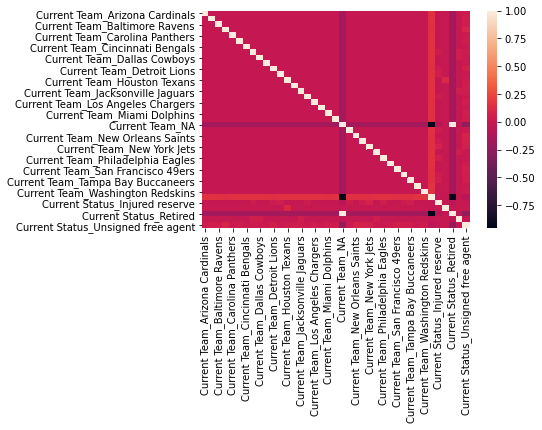

In [21]:
#Correlation of age and current status

sns.heatmap(dummy2)

# Conclusion

In [ ]:
#In these graph we can see there is one correlation. 